# Assignment 1 (5 Marks)

### Name:
### Student ID:

Our dataset contains weekly retail prices of three grades of gasoline, diesel, auto propane and compressed natural gas in 10 Ontario markets. It is downloaded from https://data.ontario.ca/dataset/fuels-price-survey-information. Please plot the following visualizations. Your visualization should be complete.

You can feel free to use the plotting packages in python. Please submit the ipynb file only.



In [ ]:
import pandas as pd
df = pd.read_csv('data/fueltypesall1991-2023.csv')

## Question 1

Compare the mean Regular Unleaded Gasoline price among different cities in 2022. Plot the corresponding bar chart.

C:\Users\RjKim\AppData\Local\Temp\ipykernel_8980\2778825270.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["Date"] = pd.to_datetime(df["Date"])


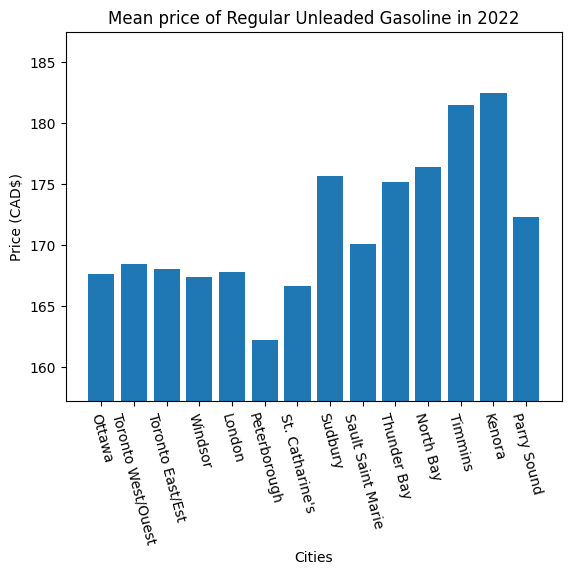

In [106]:
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

# Filter for only Regular Unleaded Gasoline
filtered = df[df["Fuel Type"] == "Regular Unleaded Gasoline"]

# Filter for entries of 2022
filtered["Date"] = pd.to_datetime(df["Date"])
filtered = filtered[filtered["Date"].dt.year == 2022]

# Calculate mean values of include dataframe
mean_values = filtered.mean(numeric_only=True)[:-3]

# Ignore non-city columns
cities = df.columns.to_list()[1:-5]

# Define lower and upper ranges for better readibility
lower_range = mean_values.min() - 5
upper_range = mean_values.max() + 5                                                                                      

plt.title("Mean price of Regular Unleaded Gasoline in 2022")
plt.xlabel("Cities") 
plt.ylabel("Price (CAD$)")
plt.ylim(lower_range, upper_range)
plt.xticks(rotation=-75)
plt.bar(cities, mean_values)
plt.show()

## Question 2

Plot the histogram of the Regular Unleaded Gasoline price in Ottawa for 2022. Choose the appropriate parameters.

C:\Users\RjKim\AppData\Local\Temp\ipykernel_8980\1513045904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["Date"] = pd.to_datetime(df["Date"])


(array([1., 1., 1., 0., 1., 1., 0., 6., 0., 2., 1., 1., 1., 1., 3., 1., 0.,
        1., 1., 1., 3., 3., 0., 1., 1., 0., 2., 3., 1., 1., 1., 2., 0., 2.,
        0., 0., 0., 0., 0., 0., 0., 1., 2., 0., 2., 0., 0., 0., 1., 0., 1.,
        1.]),
 array([134.        , 135.54230769, 137.08461538, 138.62692308,
        140.16923077, 141.71153846, 143.25384615, 144.79615385,
        146.33846154, 147.88076923, 149.42307692, 150.96538462,
        152.50769231, 154.05      , 155.59230769, 157.13461538,
        158.67692308, 160.21923077, 161.76153846, 163.30384615,
        164.84615385, 166.38846154, 167.93076923, 169.47307692,
        171.01538462, 172.55769231, 174.1       , 175.64230769,
        177.18461538, 178.72692308, 180.26923077, 181.81153846,
        183.35384615, 184.89615385, 186.43846154, 187.98076923,
        189.52307692, 191.06538462, 192.60769231, 194.15      ,
        195.69230769, 197.23461538, 198.77692308, 200.31923077,
        201.86153846, 203.40384615, 204.94615385, 206.

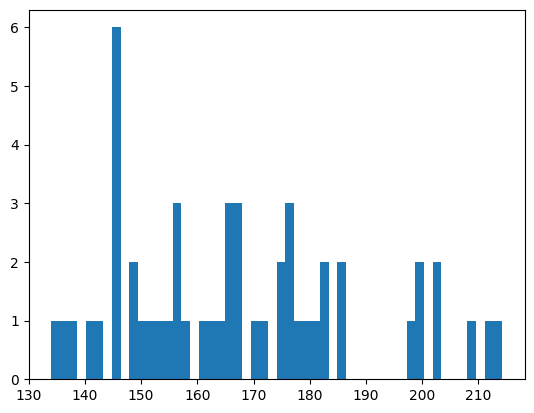

In [131]:
# Filter for only Regular Unleaded Gasoline
filtered = df[df["Fuel Type"] == "Regular Unleaded Gasoline"]

# Filter for entries of 2022
filtered["Date"] = pd.to_datetime(df["Date"])
filtered = filtered[filtered["Date"].dt.year == 2022]
filtered = filtered.filter(items=["Date", "Ottawa"])

month_name_map = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

prices = filtered["Ottawa"].to_list()
dates = filtered["Date"].to_list()

plt.hist(prices, len(prices))

## Question 3

Plot the ECDF (normalized) of the Regular Unleaded Gasoline price in Ottawa for 2022.